# Figure 1/2: Analysis & Figure Generation Code
#### Contents Description:
Contains analysis and code producing figures used in: 
Figure 1: I, J, K
Figure 2: B, C

#### Run Order
- Environment and Imports
- Config (paths, parameters)
- Load Data
- Process Data
- Figure 1 (I, J, K)
- Figure 2 (B, C)
- Save Figures and Tables

#### Environment & Imports Setup

In [21]:

import os
import sys
from typing import Dict

def _add_path(path: str) -> bool:
    if os.path.isdir(path) and path not in sys.path:
        sys.path.append(path)
        return True
    return False

def setup() -> Dict[str, str]:
    """Add project-local paths to sys.path for robust imports.
    Returns a dict of important resolved paths for convenience/logging.
    """
    here = os.path.dirname(os.path.abspath(__file__))

    func_storage = os.path.join(here, 'Function .py Storage')
    plot_posthoc_src = os.path.join(here, 'src')

    added_func = _add_path(func_storage)
    added_posthoc = _add_path(plot_posthoc_src)

    return {
        'repo_root': here,
        'function_py_storage': func_storage,
        'plot_posthoc_src': plot_posthoc_src,
        'added_function_py_storage': str(added_func),
        'added_plot_posthoc_src': str(added_posthoc),
    }
import notebook_setup
info = notebook_setup.setup()
info

{'repo_root': 'c:\\Users\\13car\\Dropbox\\local_github_repos_personal\\plot_posthoc_test',
 'function_py_storage': 'c:\\Users\\13car\\Dropbox\\local_github_repos_personal\\plot_posthoc_test\\Function .py Storage',
 'plot_posthoc_src': 'c:\\Users\\13car\\Dropbox\\local_github_repos_personal\\plot_posthoc_test\\Function .py Storage\\plot_posthoc_test\\src',
 'added_function_py_storage': 'False',
 'added_plot_posthoc_src': 'False'}

In [22]:
from pathlib import Path
import os
import notebook_setup
info = notebook_setup.setup()
# Environment & Imports Setup
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pandas as pd
import random
import pingouin as png
import mat73
## set options
%matplotlib inline 
print(f"matplotlib {matplotlib.__version__} | Seaborn {sns.__version__}")
warnings.filterwarnings(action='ignore', category=FutureWarning)
pd.set_option('mode.use_inf_as_na', False) # pd.set_option('future.no_silent_downcasting', True)
#set seed for reproducibility 
np.random.seed(1)
random.seed(1)
# Apply mplstyle via absolute path from setup info
style_path = Path(info["function_py_storage"]) / "paper_plot.mplstyle"
print(f"Loading style guide at {style_path}")
if style_path.is_file():
    plt.style.use(str(style_path))
else:
    print(f"[warn] Style not found at: {style_path}")
here = info["repo_root"]
print(f" Here: {here}")
_plot_posthoc_src = os.path.join(here, 'plot_posthoc_test', 'src')
if os.path.isdir(_plot_posthoc_src) and _plot_posthoc_src not in sys.path:
    sys.path.append(_plot_posthoc_src)
#custom function import
# import custom_module_imports as cmi 
from preprocess_data import hyper_param_dict
from ax_modifier_functions import set_ax_title_xlabel_ylabel, set_pointplot_edgecolor, set_labels
from sns_plotting_config import * #import dicts containing default plot params
import plot_posthoc_test as ppt
print(f"✓ Package loaded! Version: {ppt.__version__}")

data_location = Path(r"C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\data")


matplotlib 3.7.0 | Seaborn 0.12.1
Loading style guide at c:\Users\13car\Dropbox\local_github_repos_personal\plot_posthoc_test\Function .py Storage\paper_plot.mplstyle
 Here: c:\Users\13car\Dropbox\local_github_repos_personal\plot_posthoc_test
✓ Package loaded! Version: 0.0.1


#### Figure 1 Behavior Analysis

In [23]:
dataset_xls = pd.read_excel(data_location / "2024_Dlx Inscopix_Task Performance.xlsx", parse_dates = [2, 5,12,19], header = 0, dtype = str)
date_cols = [e for e in dataset_xls.columns if 'Date' in e]
dataset_xls = dataset_xls
dataset_xls['Age on Day 1-VEH'] = dataset_xls['Date run - VEH']- dataset_xls['DOB']
dataset_xls['Age on Day 2-CLNZ'] = dataset_xls['Date run - CLZ']- dataset_xls['DOB']
dataset_xls['Age on Day 3-postCLNZ'] = dataset_xls['Date run - POST']- dataset_xls['DOB']
##set param cols
str_to_drop = ["Cells", "DOB", "Date", ">", "<", 'Age-Run1']
numeric_cols_flag = ["IA", "RS", "Cells"]
metadata_col = [e for e in dataset_xls.columns if any(match_str in e for match_str in str_to_drop)] #return iterable element of dataset columns if said column contains any relevant substrign within the list of strings I include
print(metadata_col)
metadata_df = dataset_xls[metadata_col]
dataset_xls.drop(labels =metadata_col,axis = 1, inplace = True)
dataset_xls.replace(to_replace = "?", value = np.nan, inplace = True)
numeric_cols = [col for col in dataset_xls.columns if any(match_s in col for match_s in numeric_cols_flag)]
ID_cols = [col for col in dataset_xls.columns if any(match_str in col for match_str in ['ID', 'Geno', 'elapsed', 'Sex'])]
behav_cols =  [col for col in dataset_xls.columns if col not in ID_cols]
dataset_xls[numeric_cols] =dataset_xls[numeric_cols].apply(pd.to_numeric)
dataset_xls.sample()

['DOB', 'Age-Run1', 'Date run - VEH', 'Run1 - # Cells', 'RS TTC > IA TTC', 'Date run - CLZ', 'Run2 - # Cells', 'CLNZ RS TTC < VEH RS TTC', 'Date run - POST', 'Run3 # Cells']


,Mouse ID,Geno,Sex,IA_TTC_VEH,RS_TTC_VEH,IA_Errors_VEH,RS_Errors_VEH,IA_TTC_CLNZ,RS_TTC_CLNZ,IA_Errors_CLNZ,RS_Errors_CLNZ,IA_TTC_postCLNZ,RS_TTC_postCLNZ,IA_Errors_postCLNZ,RS_Errors_postCLNZ,Age on Day 1-VEH,Age on Day 2-CLNZ,Age on Day 3-postCLNZ
3,13-3,HET,F,15,31,3,11,15,13,4,2,11.0,21.0,0.0,7.0,106 days,107 days,120 days


import behavior df with info on perserverative vs random errors:

In [24]:
behav_detail_csv = 'Inscopix Mice Rules and Error types by session.xlsx'
behav_detail = pd.read_excel(data_location / behav_detail_csv, header = 0)
## merge
behavior_details_df = dataset_xls.merge(behav_detail.loc[:, ['Mouse ID'] + [x for x in behav_detail.columns if "Error" in x]], how = 'left', on = 'Mouse ID').drop([x for x in dataset_xls.columns if "Age" in x],axis = 1)
behav_long = behavior_details_df.melt(id_vars = ID_cols, var_name = 'Performance', value_name = 'measure').dropna(subset = 'measure')
## add description cols
behav_long['day']= behav_long.Performance.str.rpartition("_")[2] #get treatment_suffix
behav_long['data_type']=behav_long.Performance.str.split("_").str.get(1) #get measure_type
behav_long['Performance']=behav_long.Performance.str.rpartition("_")[0] #get rule + measure_type
behav_long['rule'] = behav_long.Performance.str.split("_").str.get(0) #get rule_prefix
behav_long['geno_day']= behav_long['Geno'].str.cat(behav_long['day'], sep = '_') .map({o:n for o,n in zip(["WT_VEH", "WT_CLNZ", "HET_VEH", "HET_CLNZ", "HET_postCLNZ"], geno_order_w_WT_CLNZ)})#clean up rough concat. with established label types
behav_long = behav_long.dropna().reset_index().drop('index', axis = 1)
print(behav_long.geno_day.unique())
behav_long.tail()

['Het VEH' 'WT VEH' 'Het CLNZ' 'WT CLNZ' 'Het postCLNZ']


,Mouse ID,Geno,Sex,Performance,measure,day,data_type,rule,geno_day
143,9-3,HET,F,Random_Error,1.0,postCLNZ,Error,Random,Het postCLNZ
144,13-3,HET,F,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
145,13-5,HET,M,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
146,13-8,HET,M,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
147,15-1,HET,M,Random_Error,1.0,postCLNZ,Error,Random,Het postCLNZ


#### Figure 1 I, J, K: IA and RS trials to completion, and perseverative errors 

With axis variable == Hue variable:
With axis variable == Hue variable:


NameError: name 'annotator_default' is not defined

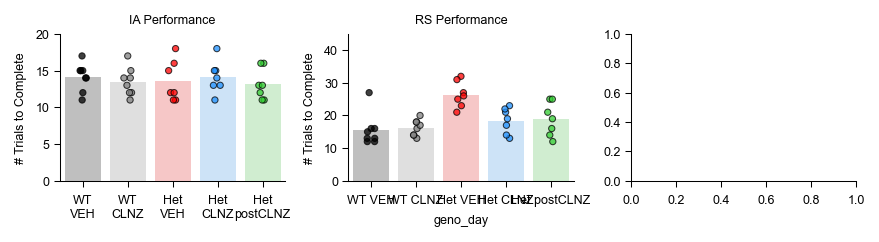

In [25]:
#parameters for figures
col_iter = ['IA_TTC', 'RS_TTC', 'Perseverative_Error']
titles = ["IA Performance", "RS Performance", "# Perseverative Errors"]
ylabels = ['# Trials to Complete', '# Trials to Complete', '# Errors']
plot_range_limit = {"IA_TTC": 20, "RS_TTC": 45, "Perseverative_Error": 17}
pairs_to_compare = [('WT VEH',  'Het VEH'),('WT VEH', 'WT CLNZ'), ('WT CLNZ',  'Het VEH'),  ('Het VEH', 'Het CLNZ'), ('Het VEH', 'Het postCLNZ')]
## Figure creation code 
fig, ax = plt.subplots(1, len(col_iter), figsize = (5.75,1.5), layout = 'constrained', gridspec_kw = {'wspace': 0.01})
behav_posthoc_list = []
## loop over all comparisons
for col_count, col_elem in enumerate(col_iter):## iterate over data types
    plot_mask = (behav_long['Performance'] == col_elem)
    plot_ax = ax[col_count]
    plot_params = {'data':behav_long.loc[plot_mask,:], 'x':'geno_day', 'y':'measure', 'order': geno_order_w_WT_CLNZ,
                   'hue':'geno_day', 'hue_order':geno_order_w_WT_CLNZ,'palette': color_list_WT_CLNZ,}
    sc = sns.barplot(ax = plot_ax, dodge = False,**plot_params, errorbar=None, linewidth = 1, alpha=0.25) 
    ax_title = f"{titles[col_count]}"
    set_ax_title_xlabel_ylabel(plot_ax, {'title': ax_title, 'legend_false': True, 'ylabel': f"{ylabels[col_count]}", 'xlim': [None, None],'ylim':[0, plot_range_limit[col_elem]], })
    #alter axis x ticks
    plot_ax.set_xticks(plot_ax.get_xticks());
    plot_ax.yaxis.get_major_locator().set_params(integer=True)
    ##NEW- plot scatter over
    sc = sns.stripplot(ax = plot_ax, dodge = False,**plot_params, alpha=0.75, s = 3,legend=False) 
    set_pointplot_edgecolor(plot_ax, edge_color = 'black', linewidth = marker_edge_width)
    #posthoc df- on stripplot
    posthoc_df = ppt.annotate(plot_ax, plot_params, sc, pairs_to_compare, test_name = 'MWU',ax_var_is_hue=True, detect_error_bar = False, plot_type = 'stripplot')
    ppt.plot_significance(plot_ax, posthoc_df[posthoc_df['pvalue'] < 0.05], tight_offset = 0.06,offset_constant = 0.01,debug = False) #default_star_bbox_size = 0.045 #in ax fraction, determined empirically
    behav_posthoc_list.append(posthoc_df.assign(numeric_var=col_elem))#store posthoc comparison
    set_ax_title_xlabel_ylabel(plot_ax, {'xlabel':  None,})
    plot_ax.set_xticklabels([x.get_text().replace(" ", "\n") for x in plot_ax.get_xticklabels()])
    #save each sub component as own CSV
#save figs 